<a href="https://colab.research.google.com/github/SuleymanToklu/AI/blob/main/boston_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries and Load Data

In [8]:
# --- Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# --- Constants ---
# This makes it easy to change data sources or parameters later.
DATA_URL = "http://lib.stat.cmu.edu/datasets/boston"
FEATURE_NAMES = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
TARGET_NAME = 'PRICE'
TEST_SIZE = 0.2
RANDOM_STATE = 42

print("Setup Complete: Libraries imported and constants defined.")

Setup Complete: Libraries imported and constants defined.


In [9]:
# --- Load Data ---
# Fetch the data from the URL and construct the DataFrame.
raw_df = pd.read_csv(DATA_URL, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# --- Create DataFrame ---
X = pd.DataFrame(data, columns=FEATURE_NAMES)
y = pd.Series(target, name=TARGET_NAME)

# Combine features and target for initial inspection
df_initial = pd.concat([X, y], axis=1)

# --- Initial Inspection ---
print("--- First 5 Rows of the Dataset ---")
print(df_initial.head())
print("\n--- Dataset Info ---")
df_initial.info()

--- First 5 Rows of the Dataset ---
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float6

## FEATURES - Feature Engineering & Preprocessing

In [10]:
# --- Split the Data ---
# Separate data into training and testing sets before any scaling.
# This prevents data leakage from the test set into the training process.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

# --- Scale the Features ---
# Use StandardScaler to standardize features by removing the mean and scaling to unit variance.
# It's important to fit the scaler ONLY on the training data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for clarity
X_train_scaled = pd.DataFrame(X_train_scaled, columns=FEATURE_NAMES)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=FEATURE_NAMES)


print("Data split and scaled successfully.")
print(f"Training features shape: {X_train_scaled.shape}")
print(f"Testing features shape: {X_test_scaled.shape}")
print("\n--- First 5 Rows of Scaled Training Data ---")
print(X_train_scaled.head())

Data split and scaled successfully.
Training features shape: (404, 13)
Testing features shape: (102, 13)

--- First 5 Rows of Scaled Training Data ---
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0  1.287702 -0.500320  1.033237 -0.278089  0.489252 -1.428069  1.028015   
1 -0.336384 -0.500320 -0.413160 -0.278089 -0.157233 -0.680087 -0.431199   
2 -0.403253  1.013271 -0.715218 -0.278089 -1.008723 -0.402063 -1.618599   
3  0.388230 -0.500320  1.033237 -0.278089  0.489252 -0.300450  0.591681   
4 -0.325282 -0.500320 -0.413160 -0.278089 -0.157233 -0.831094  0.033747   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0 -0.802173  1.706891  1.578434  0.845343 -0.074337  1.753505  
1  0.324349 -0.624360 -0.584648  1.204741  0.430184 -0.561474  
2  1.330697 -0.974048 -0.602724 -0.637176  0.065297 -0.651595  
3 -0.839240  1.706891  1.578434  0.845343 -3.868193  1.525387  
4 -0.005494 -0.624360 -0.584648  1.204741  0.379119 -0.165787  


## MODELS - Train the Model


In [11]:
# --- Initialize the Model ---
# RandomForestRegressor is a powerful ensemble model.
# n_estimators is the number of trees in the forest.
# random_state ensures reproducibility.
model = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)


# --- Train the Model ---
# Fit the model on the scaled training data.
model.fit(X_train_scaled, y_train)

print("Model training complete.")
print(f"Model: {type(model).__name__}")

Model training complete.
Model: RandomForestRegressor


## EVALUATION - Predict and Evaluate

In [12]:
# --- Make Predictions ---
# Use the trained model to make predictions on the scaled test data.
y_pred = model.predict(X_test_scaled)

# --- Evaluate Metrics ---
# Calculate MSE and R2 score to understand model performance.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Model Performance ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# --- Sample Prediction Check ---
# Compare prediction with actual value for one sample.
sample_index = 0
actual_price = y_test.iloc[sample_index]
predicted_price = y_pred[sample_index]

print("\n--- Sample Prediction ---")
print(f"Actual Price: ${actual_price * 1000:,.2f}")
print(f"Predicted Price: ${predicted_price * 1000:,.2f}")

--- Model Performance ---
Mean Squared Error (MSE): 7.91
R-squared (R2) Score: 0.89

--- Sample Prediction ---
Actual Price: $23,600.00
Predicted Price: $22,839.00


## VISUALIZATION - Visualize Results


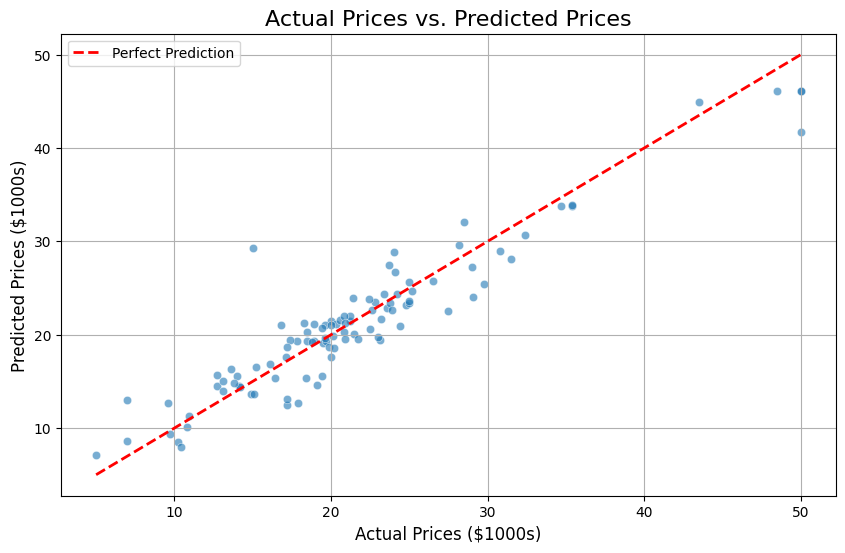

In [13]:
# --- Create Scatter Plot of Predictions vs Actuals ---
# A perfect model would have all points on the 45-degree line.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# --- Add the "Perfect Prediction" line ---
# This line represents where y_test equals y_pred.
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Perfect Prediction')

# --- Final Touches ---
plt.title('Actual Prices vs. Predicted Prices', fontsize=16)
plt.xlabel('Actual Prices ($1000s)', fontsize=12)
plt.ylabel('Predicted Prices ($1000s)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## TUNING - Hyperparameter Optimization with GridSearchCV

In [14]:
# --- Define the Parameter Grid ---
# These are the hyperparameters we want to test.
# This is a small grid to keep the runtime short.
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_depth': [10, 20, None],           # Maximum depth of the tree
    'min_samples_leaf': [1, 2, 4]          # Minimum number of samples required at a leaf node
}

# --- Initialize GridSearchCV ---
# It will test all combinations from the param_grid using 5-fold cross-validation.
# n_jobs=-1 uses all available CPU cores to speed up the process.
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=RANDOM_STATE),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2, # Shows progress
    scoring='r2'
)

# --- Fit the Grid Search ---
# This process finds the best model by training on the (scaled) training data.
grid_search.fit(X_train_scaled, y_train)

# --- Get the Best Model ---
best_model = grid_search.best_estimator_

print("\n--- Hyperparameter Tuning Complete ---")
print(f"Best Parameters Found: {grid_search.best_params_}")
print(f"Best R2 Score on Cross-Validation: {grid_search.best_score_:.4f}")

# --- Re-evaluate with the Best Model ---
y_pred_best = best_model.predict(X_test_scaled)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nTest Set R2 Score with Best Model: {r2_best:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

--- Hyperparameter Tuning Complete ---
Best Parameters Found: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Best R2 Score on Cross-Validation: 0.8262

Test Set R2 Score with Best Model: 0.8921


## ANALYSIS - Visualize Feature Importances

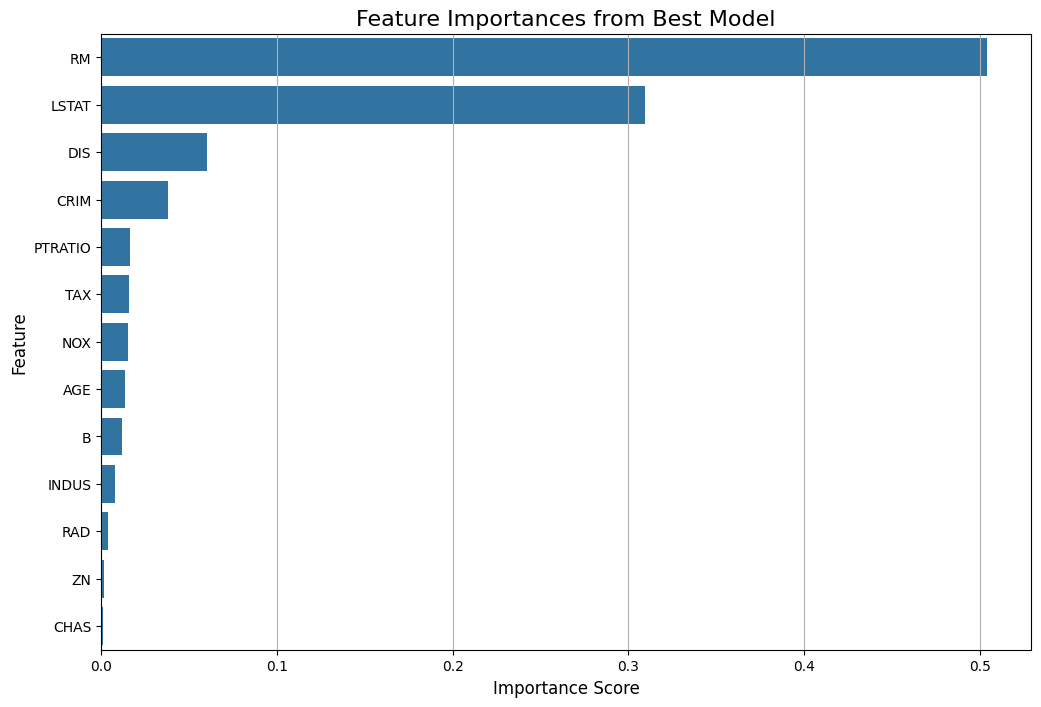


--- Top 5 Most Important Features ---
    Feature  Importance
5        RM    0.503845
12    LSTAT    0.309509
7       DIS    0.060549
0      CRIM    0.038062
10  PTRATIO    0.016313


In [15]:
# --- Get Feature Importances ---
# Get the importance scores from our 'best_model' found by GridSearchCV.
importances = best_model.feature_importances_

# --- Create a DataFrame for easy plotting ---
feature_importance_df = pd.DataFrame({
    'Feature': FEATURE_NAMES,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# --- Plot the results ---
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Best Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True, axis='x')
plt.show()

print("\n--- Top 5 Most Important Features ---")
print(feature_importance_df.head())

## DEPLOY - Save and Load the Model for Inference


In [16]:
import joblib

# --- Define File Paths ---
MODEL_PATH = "best_boston_housing_model.joblib"
SCALER_PATH = "boston_housing_scaler.joblib"

# --- Save the Model and the Scaler ---
# It's CRITICAL to save the scaler used to preprocess the training data.
joblib.dump(best_model, MODEL_PATH)
joblib.dump(scaler, SCALER_PATH)

print(f"Model saved to {MODEL_PATH}")
print(f"Scaler saved to {SCALER_PATH}")


# --- INFERENCE SIMULATION ---
# This simulates loading the model in a different application/session.
print("\n--- Simulating Inference ---")
loaded_model = joblib.load(MODEL_PATH)
loaded_scaler = joblib.load(SCALER_PATH)

# Create a sample of new raw data (using the first row of original X_test for example)
new_raw_data = X_test.iloc[[5]]
print(f"New Raw Data:\n{new_raw_data}")

# Preprocess the new data using the LOADED scaler
new_data_scaled = loaded_scaler.transform(new_raw_data)

# Make prediction with the LOADED model
prediction = loaded_model.predict(new_data_scaled)

print(f"\nPredicted Price for New Data: ${prediction[0] * 1000:,.2f}")
print(f"Actual Price for Comparison: ${y_test.iloc[5] * 1000:,.2f}")

Model saved to best_boston_housing_model.joblib
Scaler saved to boston_housing_scaler.joblib

--- Simulating Inference ---
New Raw Data:
       CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
76  0.10153  0.0  12.83   0.0  0.437  6.279  74.5  4.0522  5.0  398.0   

    PTRATIO       B  LSTAT  
76     18.7  373.66  11.97  

Predicted Price for New Data: $21,425.00
Actual Price for Comparison: $20,000.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
